<a href="https://colab.research.google.com/github/Uthantaiml/huggingface_hub/blob/main/UTHANT__Weighted_word_autocomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint


## About Dataset

Context
Star Wars is a popular film franchise that takes place in a galaxy far, far away. This is a collection of script dialogue between characters for the first three movies (episodes 4-6). Since it's a holiday (and just because Star Wars is an awesome movie), this data should serve as a fun way to implement text mining and linguistics.

## Content

**SW_EpisodeIV.txt** Script from the Episode IV: A New Hope with columns character and dialogue.

**SW_EpisodeV.txt** Script from the Episode V: The Empire Strikes Back with columns character and dialogue.

**SW_EpisodeVI.txt** Script from the Episode VI: Return of the Jedi with columns character and dialogue.


### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2304537" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9121534285" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import re
ipython = get_ipython()

notebook= "Autocompletion_GPT2" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx wget https://drive.google.com/uc?id=12jYBY0yqwNEErkqol06BtEQF3C-wSUBS -O document.pdf")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
               "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml-iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [ ]:
# @title Download dataset
!gdown https://drive.google.com/uc?id=1JpLxcTsEeAkrIUUx3QScSm7H-ibc75vI
!gdown https://drive.google.com/uc?id=1XHSgDYSsaetBV2W7N8qAxweyBTupTAsB
!gdown https://drive.google.com/uc?id=1PoRtZuffw1lKmkPNoSdNGQBBMmSRTjFm

Downloading...
From: https://drive.google.com/uc?id=1JpLxcTsEeAkrIUUx3QScSm7H-ibc75vI
To: /content/SW_EpisodeIV.txt
100% 78.3k/78.3k [00:00<00:00, 68.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XHSgDYSsaetBV2W7N8qAxweyBTupTAsB
To: /content/SW_EpisodeV.txt
100% 55.5k/55.5k [00:00<00:00, 58.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PoRtZuffw1lKmkPNoSdNGQBBMmSRTjFm
To: /content/SW_EpisodeVI.txt
100% 48.2k/48.2k [00:00<00:00, 70.0MB/s]


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string
import os

The idea here is to keep a corpus of words in a [trie](https://en.wikipedia.org/wiki/Trie). We will store the occurrence of each letter during the learning phase.
When we come to try and autocomplete a word we're going to:


1. Go through the trie and try to find where the end of the input lives in our structure (we return an error if the given word doesn't exist).
2. Search the next set of potential characters using a breadth first approach, keeping just the characters that are most likely to show up next (this is what you need the occurance count for).
3. Record the score of each finished word (shown by `<eow>` below) in a list.

Among the features that use autocomplete are

- The trie can be trained online. You could instantly update the search if a user inputs a word you haven't seen before.
- It does a very limited search and only selects the branches that appear to have the highest chance of returning relevant results.



In [ ]:
# Load the script data from each episode file
# We're assuming that each line in the text files represents a separate dialogue or line in the script.

# Read Episode IV script, skipping any lines that cause errors during import
df_IV = pd.read_table("SW_EpisodeIV.txt", on_bad_lines='skip')
# Read Episode V script, skipping any lines that cause errors during import
df_V = pd.read_table("SW_EpisodeV.txt", on_bad_lines='skip')
# Read Episode VI script, skipping any lines that cause errors during import
df_VI = pd.read_table("SW_EpisodeVI.txt", on_bad_lines='skip')

In [ ]:
# Set pandas to display the full width of any column, so we can see all text without truncation.
pd.set_option('display.max_colwidth', 0)

# Rename the single column in each DataFrame to 'text' for consistency and easier access
df_IV.columns = ['text']
df_V.columns = ['text']
df_VI.columns = ['text']

# Display the first 5 rows of the Episode IV DataFrame to verify the data structure and content
df_IV.head(5)

,text
0,"1 ""THREEPIO"" ""Did you hear that? They've shut down the main reactor. We'll be destroyed for sure. This is madness!"""
1,"2 ""THREEPIO"" ""We're doomed!"""
2,"3 ""THREEPIO"" ""There'll be no escape for the Princess this time."""
3,"4 ""THREEPIO"" ""What's that?"""
4,"5 ""THREEPIO"" ""I should have known better than to trust the logic of a half-sized thermocapsulary dehousing assister..."""


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_IV)

https://docs.google.com/spreadsheets/d/1v0A8GGxeAWrSqjKX1Z4I-k5bkV3PHQvn4WWDbU5ED8o#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
def prep_text(in_text):
    return in_text.split('"')[3:-1][0].lower().translate(str.maketrans("", "", string.punctuation)).split()

Clean the text a bit

In [ ]:
# Apply the prep_text function to the 'text' column of the df_IV DataFrame
# This will clean the text by splitting it, removing punctuation, converting it to lowercase, and splitting it into words
df_IV['clean_text'] = df_IV.apply(lambda row: prep_text(row['text']), axis=1)

# Apply the same prep_text function to the 'text' column of the df_V DataFrame
# This will clean the text in the same way as for Episode IV
df_V['clean_text'] = df_V.apply(lambda row: prep_text(row['text']), axis=1)

# Apply the same prep_text function to the 'text' column of the df_VI DataFrame
# This will clean the text in the same way as for Episode IV and V
df_VI['clean_text'] = df_VI.apply(lambda row: prep_text(row['text']), axis=1)

# Display the first 5 rows of the df_IV DataFrame to inspect the cleaned text
# This will show both the original 'text' column and the new 'clean_text' column
df_IV.head(5)


,text,clean_text
0,"1 ""THREEPIO"" ""Did you hear that? They've shut down the main reactor. We'll be destroyed for sure. This is madness!""","[did, you, hear, that, theyve, shut, down, the, main, reactor, well, be, destroyed, for, sure, this, is, madness]"
1,"2 ""THREEPIO"" ""We're doomed!""","[were, doomed]"
2,"3 ""THREEPIO"" ""There'll be no escape for the Princess this time.""","[therell, be, no, escape, for, the, princess, this, time]"
3,"4 ""THREEPIO"" ""What's that?""","[whats, that]"
4,"5 ""THREEPIO"" ""I should have known better than to trust the logic of a half-sized thermocapsulary dehousing assister...""","[i, should, have, known, better, than, to, trust, the, logic, of, a, halfsized, thermocapsulary, dehousing, assister]"


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_IV)

https://docs.google.com/spreadsheets/d/1cqz7JolC3Hlztj26OZxtAfPVz7_wMzWY_LwxT-gAbJI#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
# Concatenate the DataFrames df_IV, df_V, and df_VI along rows (axis=0)
# This combines the data from all three episodes into a single DataFrame.
df = pd.concat([df_IV, df_V, df_VI])

# Display the first 5 rows of the concatenated DataFrame to ensure it was combined correctly
df.head(5)

,text,clean_text
0,"1 ""THREEPIO"" ""Did you hear that? They've shut down the main reactor. We'll be destroyed for sure. This is madness!""","[did, you, hear, that, theyve, shut, down, the, main, reactor, well, be, destroyed, for, sure, this, is, madness]"
1,"2 ""THREEPIO"" ""We're doomed!""","[were, doomed]"
2,"3 ""THREEPIO"" ""There'll be no escape for the Princess this time.""","[therell, be, no, escape, for, the, princess, this, time]"
3,"4 ""THREEPIO"" ""What's that?""","[whats, that]"
4,"5 ""THREEPIO"" ""I should have known better than to trust the logic of a half-sized thermocapsulary dehousing assister...""","[i, should, have, known, better, than, to, trust, the, logic, of, a, halfsized, thermocapsulary, dehousing, assister]"


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/10BM_BQkHMu54tgZZ-8Rlp3PsfqG1hzPTTmeIDg7nzxg#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
# Initialize an empty list to store the sentences (cleaned text)
sentences = list()

# Iterate over each row in the DataFrame using iterrows()
# This allows us to access both the index (idx) and the row itself
for idx, row in df.iterrows():
    # For each row, we append the cleaned text (from the 'clean_text' column) to the sentences list
    sentences.append(row['clean_text'])

# After running the loop, the 'sentences' list will contain all the cleaned sentences from the 'clean_text' column

In [ ]:
sentences[:3]

[['did',
  'you',
  'hear',
  'that',
  'theyve',
  'shut',
  'down',
  'the',
  'main',
  'reactor',
  'well',
  'be',
  'destroyed',
  'for',
  'sure',
  'this',
  'is',
  'madness'],
 ['were', 'doomed'],
 ['therell', 'be', 'no', 'escape', 'for', 'the', 'princess', 'this', 'time']]

In [ ]:
# Flatten the list of lists ('sentences') into a single list ('flat_list')
# This is done using a list comprehension that loops through each sublist (each sentence) in 'sentences'
# and extracts each word (item) from the sublist, effectively combining all the words into one list.
flat_list = [item for sublist in sentences for item in sublist]

# Now 'flat_list' contains all the individual words from the entire dataset,
# flattened into a single list (removing the structure of sentences).

In [ ]:
# Convert the flattened list 'flat_list' into a pandas DataFrame
# Each word in 'flat_list' will be placed in a new row of the DataFrame
df_clean = pd.DataFrame(flat_list)

# Rename the single column in the DataFrame to 'clean' for clarity
# This column will now represent the individual words from the entire dataset
df_clean.columns = ['clean']

# The DataFrame 'df_clean' now contains a single column called 'clean',
# where each row corresponds to a word from the flattened 'flat_list'.


In [ ]:
# Create a new column 'lengths' in the DataFrame df_clean
# This column will store the length of each word (the number of characters in each word) in the 'clean' column
df_clean['lengths'] = df_clean.apply(lambda row: len(row['clean']), axis=1)

# The 'apply' function is used to apply a lambda function to each row.
# The lambda function calculates the length of each word by applying the len() function to the value in the 'clean' column.

What does the distribution of word lengths look like? As you can see it's pretty heavily weighted to words of less than about 5 characters

<Axes: ylabel='Frequency'>

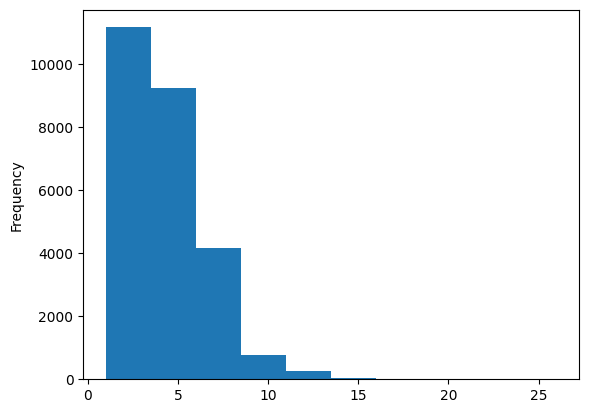

In [ ]:
# Plot a histogram of the 'lengths' column from the df_clean DataFrame
# The 'kind='hist'' argument specifies that the plot should be a histogram
df_clean['lengths'].plot(kind='hist')

# This will visualize the distribution of word lengths in the dataset.
# The histogram will display the frequency of different word lengths.

In [ ]:
# Initialize an empty list to store the processed words
y = []

# Loop through each element (word list) in the 'clean' column of the df_clean DataFrame
for item in df_clean['clean'].values:
    # Convert each word (a string) into a list of characters
    l = list(item)

    # Append the special end-of-word token "<eow>" to the list of characters
    l.append("<eow>")

    # Add the modified list (with characters and "<eow>" token) to the list 'y'
    y.append(l)

# The 'y' list now contains each word split into a list of characters, with "<eow>" added at the end of each word


In [ ]:
y[:5]

[['d', 'i', 'd', '<eow>'],
 ['y', 'o', 'u', '<eow>'],
 ['h', 'e', 'a', 'r', '<eow>'],
 ['t', 'h', 'a', 't', '<eow>'],
 ['t', 'h', 'e', 'y', 'v', 'e', '<eow>']]

In [ ]:
# Calculate the number of unique words in the 'clean' column of the df_clean DataFrame
# The .unique() method returns an array of unique values in the 'clean' column
out_len = len(df_clean['clean'].unique())

# The variable 'out_len' now holds the count of unique words in the 'clean' column
out_len


2950

In [ ]:
class WeightedTrie:
    # Constructor method to initialize a new WeightedTrie object
    def __init__(self):
        # Initialize the count attribute. It will keep track of the number of unique prefixes/words in the trie.
        self.count = 1

        # Initialize the tails attribute. It will store the children of each node (i.e., the next characters in the trie).
        self.tails = {}

In [ ]:
def create_trie(in_text):
    # Create a new WeightedTrie object to start building the trie
    trie = WeightedTrie()

    # Iterate over each word in 'y', which is a list of processed words
    for word in y:
        # Start with the root of the trie for each word
        curr = trie

        # Iterate over each letter in the current word
        for letter in word:
            # If the letter already exists as a child node in the current trie node (curr)
            if letter in curr.tails:
                # Move to the next trie node corresponding to the letter
                curr = curr.tails[letter]
                # Increment the count of occurrences for this prefix/word
                curr.count += 1
            else:
                # If the letter doesn't exist in the current node's children, create a new node
                new_trie = WeightedTrie()
                # Add the new node as a child of the current node, keyed by the letter
                curr.tails[letter] = new_trie
                # Move to the newly created node
                curr = new_trie

    # Return the root of the trie, now fully populated with the input words
    return trie


In [ ]:
trie = create_trie(y)

In [ ]:
def predict(word_start, dic, n=3, width=26):
    # Convert the starting word into a list of characters
    cs = list(word_start)

    # Start at the root of the trie (dic)
    curr = dic

    # Traverse the trie following the characters of the input word_start
    for c in cs:
        if c in curr.tails:
            # Move to the next node in the trie
            curr = curr.tails[c]
        else:
            # If the character is not found in the trie, return a message
            return "word not found, perhaps add it to known words?"

    # At this point, we've traversed part of the trie based on the word_start prefix
    # Now we will perform a breadth-first search (BFS) to find the most likely words
    # that extend from the prefix word_start.

    # Initialize containers for holding the top words, scores, and the queue for BFS
    topn = []  # List to store the top-n predictions
    scores = []  # List to store the scores associated with each word
    node_queue = []  # Queue for BFS, holds tuples (score, word_so_far, next_level_dict)
    tmp = []  # Temporary list to hold intermediate results

    # Iterate over all the possible next characters from the current node
    for k, v in curr.tails.items():
        # Calculate the score for each possible next character.
        # The score is penalized for longer words (longer prefix lengths).
        score = v.count / len(cs + [k])
        tmp.append((score, cs + [k], v.tails))

    # Sort the results by score (in descending order) to prioritize higher-frequency words
    tmp2 = sorted(tmp, reverse=True)

    # Add the top 'width' (most likely) words to the BFS queue
    for item in tmp2[:width]:
        node_queue.append(item)

    # Perform BFS to expand the search for the top-n most likely completions
    while node_queue and len(topn) < n:
        # Pop the first element from the queue
        current_score, so_far, next_dic = node_queue.pop(0)

        # If the current word ends (indicated by '<eow>'), add it to the result list
        if so_far[-1] == '<eow>':
            topn.append(so_far)
            scores.append(current_score)

        # Expand the search by adding the next level of words (next_dic)
        tmp = []
        for k, v in next_dic.items():
            # Calculate the score for extending the word with the character 'k'
            score = (current_score + v.count) / len(so_far + [k])
            tmp.append((score, so_far + [k], v.tails))

        # Sort the results again by score (in descending order)
        tmp2 = sorted(tmp, reverse=True)

        # Add the top 'width' (most likely) words to the BFS queue
        for item in tmp2[:width]:
            node_queue.append(item)

    # Return the top-n predictions, sorted by score in descending order
    # The predictions are tuples of (score, word)
    return sorted([(s, ''.join(item[:-1])) for item, s in zip(topn, scores)], reverse=True)


In [ ]:
%%time
predict("vade", trie)

CPU times: user 47 µs, sys: 6 µs, total: 53 µs
Wall time: 58.2 µs


[(10.333333333333334, 'vader'), (0.9285714285714286, 'vaders')]

In [ ]:
%%time
predict("le", trie, n=10)

CPU times: user 179 µs, sys: 0 ns, total: 179 µs
Wall time: 186 µs


[(12.25, 'let'),
 (9.2, 'leia'),
 (8.75, 'lets'),
 (4.1, 'lead'),
 (3.4666666666666663, 'left'),
 (2.0, 'leak'),
 (0.8, 'less'),
 (0.5833333333333333, 'leg'),
 (0.5666666666666667, 'legs'),
 (0.3333333333333333, 'led')]

### Please answer the questions below to complete the experiment:




In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Very Nice Model" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for Ungrading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 9405
Date of submission:  12 Nov 2024
Time of submission:  21:59:00
View your submissions: https://aiml-iiith.talentsprint.com/notebook_submissions
